In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("white")

%matplotlib inline

In [3]:
%run functions_wiki.py

In [179]:
data = pd.read_csv("../../data/AirPlay_1.txt", sep="\t")

In [180]:
data['timestamp'] =  pd.to_datetime(data['timestamp'])
data = data.sort_values('timestamp').reset_index(drop=True)

In [181]:
def get_delta(x):
    m = min(x)
    return [(c-m).total_seconds()/(60*60*24) for c in x]

In [182]:
data['tmp'] = get_delta(data['timestamp'])

In [183]:
def plot_freq(freq, title):
    plt.figure(figsize=(12,3))
    plt.plot(freq, [1]*len(data), '|', markersize=1000,
             markeredgewidth=0.05, markeredgecolor='k')
    plt.ylim(0.99,1.01)
    plt.xlim(min(data['tmp']),max(data['tmp']))
    frame1 = plt.gca()
    frame1.get_xaxis().set_visible(False)
    frame1.get_yaxis().set_visible(False)
    plt.title(title)
#     plt.savefig(title+".png", dpi=300, bbox_inches='tight')

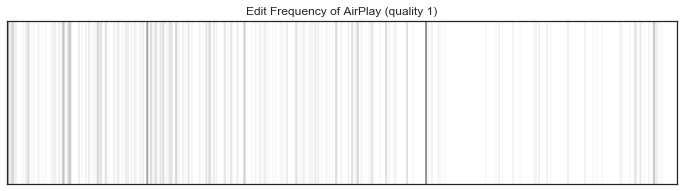

In [191]:
plot_freq(data['tmp'],'Edit Frequency of AirPlay (quality 1)')

In [181]:
intervals = get_time_intervals(data)
cal_burstiness(intervals)

0.38981482692796138

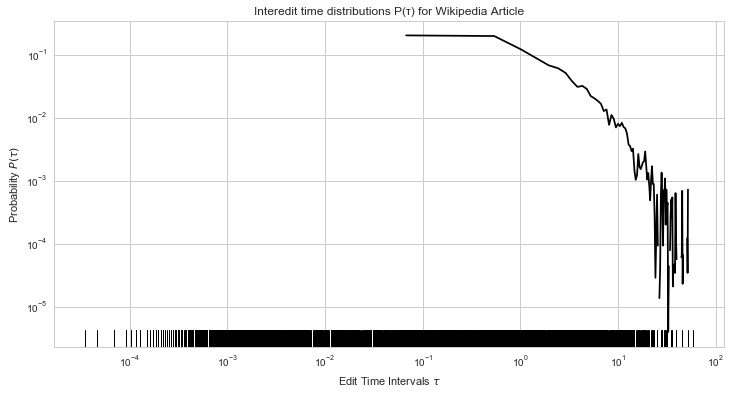

In [197]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12,6))
#     sns.distplot(intervals, hist=False)
    sns.distplot(intervals, hist=False, rug=True,color='black')
    plt.gca().set_yscale("log")
    plt.gca().set_xscale("log")
    plt.xlabel(r'Edit Time Intervals $\tau$')
    plt.ylabel(r'Probability $P(\tau)$')    
    plt.title('Interedit time distributions P(τ) for Wikipedia Article')
    plt.savefig('Interedit time distributions P(τ) for Wikipedia Article'+".png", dpi=300, bbox_inches='tight')

In [147]:
data2 = pd.read_csv("../../hypothesis_test_data_backup.txt",sep="\t")

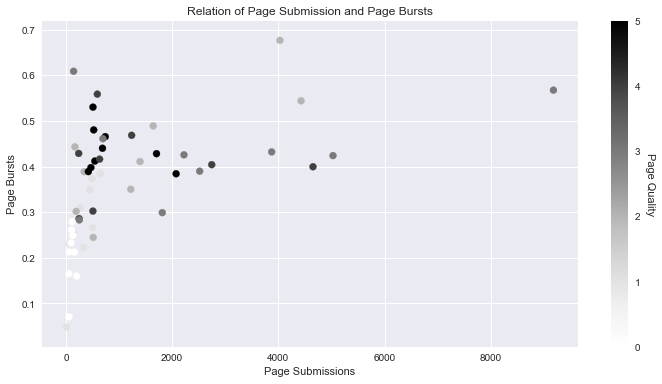

In [157]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12,6))
    plt.scatter(x=data2['submissions'], y=data2['bursts'], c = data2['quality'].apply(int))
    plt.xlabel('Page Submissions')
    plt.ylabel('Page Bursts')
    cbar = plt.colorbar()
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Page Quality', rotation=270)
    plt.title('Relation of Page Submission and Page Bursts')
    plt.savefig('Relation of Page Submission and Page Bursts'+".png", dpi=300, bbox_inches='tight')

### try to plot top user's edit in different colors 

In [185]:
def get_delta(x,mini):
    return [(c-mini).total_seconds()/(60*60*24) for c in x]

In [186]:
def plot_top_users(data, N):
    colors = ['b', 'r', 'g','c', 'm', 'y', 'k']
    top_users = data['user'].value_counts()[:N].index
    print("top users are ", ", ".join(top_users))

    # generate user edit time freq
    mi = min(data['timestamp'])
    ma = max(data['timestamp'])
    freq_users = {}
    for user in top_users:
        mask = data['user'] == user
        tmp = data[mask]['timestamp']
        freq_users[user] = get_delta(tmp, mi)

    # plot 
    plt.figure(figsize=(12,1))
    color=colors[:N]
    for c, values in zip(color,freq_users.values()):
        plt.plot(values, [1]*len(values), '|', markersize=1000,
                 markeredgewidth=0.1, markeredgecolor=c)
    plt.annotate(s = 'N = %s' %N, xy=(10,1), xytext=(10,1))
    plt.ylim(0.99,1.01)
    plt.xlim(0,(ma - mi).total_seconds()/(60*60*24))
    frame1 = plt.gca()
    frame1.get_xaxis().set_visible(False)
    frame1.get_yaxis().set_visible(False)

top users are  80.101.80.116, 81.255.42.139


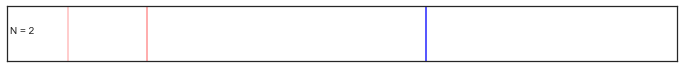

In [187]:
plot_top_users(data, N=2)

top users are  80.101.80.116, 81.255.42.139, 164.4.17.32


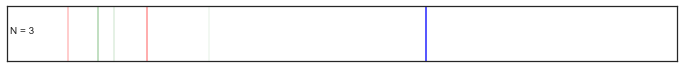

In [188]:
plot_top_users(data, N=3)

top users are  80.101.80.116, 81.255.42.139, 164.4.17.32, UKER


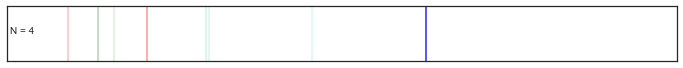

In [189]:
plot_top_users(data, N=4)

top users are  80.101.80.116, 81.255.42.139, 164.4.17.32, UKER, 76.3.179.148


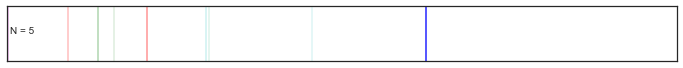

In [190]:
plot_top_users(data, N=5)